In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'amitkumar136'
os.environ['KAGGLE_KEY'] = '6a8e92de028e7da322ba6da881d7a5db'

In [2]:
!kaggle datasets download -d tr1gg3rtrash/yoga-posture-dataset

 99% 440M/447M [00:14<00:00, 36.0MB/s]
100% 447M/447M [00:14<00:00, 31.5MB/s]


In [3]:
!unzip -qq yoga-posture-dataset.zip

In [4]:
!rm -rf sample_data yoga-posture-dataset.zip

In [5]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 509 kB 32.6 MB/s 


In [6]:
from fastai import *
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.metrics import *
import torch
import timm

In [10]:
dls = ImageDataLoaders.from_folder(
    '.',
    item_tfms=Resize(224),
    valid_pct=0.2,
    bs=32,
    seed=42
)

In [42]:
classes = dls.vocab
classes

['Adho Mukha Svanasana', 'Adho Mukha Vrksasana', 'Alanasana', 'Anjaneyasana', 'Ardha Chandrasana', 'Ardha Matsyendrasana', 'Ardha Navasana', 'Ardha Pincha Mayurasana', 'Ashta Chandrasana', 'Baddha Konasana', 'Bakasana', 'Balasana', 'Bitilasana', 'Camatkarasana', 'Dhanurasana', 'Eka Pada Rajakapotasana', 'Garudasana', 'Halasana', 'Hanumanasana', 'Malasana', 'Marjaryasana', 'Navasana', 'Padmasana', 'Parsva Virabhadrasana', 'Parsvottanasana', 'Paschimottanasana', 'Phalakasana', 'Pincha Mayurasana', 'Salamba Bhujangasana', 'Salamba Sarvangasana', 'Setu Bandha Sarvangasana', 'Sivasana', 'Supta Kapotasana', 'Trikonasana', 'Upavistha Konasana', 'Urdhva Dhanurasana', 'Urdhva Mukha Svsnssana', 'Ustrasana', 'Utkatasana', 'Uttanasana', 'Utthita Hasta Padangusthasana', 'Utthita Parsvakonasana', 'Vasisthasana', 'Virabhadrasana One', 'Virabhadrasana Three', 'Virabhadrasana Two', 'Vrksasana']

In [8]:
from timm.models import *
list_models('*resnet*') 

['cspresnet50',
 'cspresnet50d',
 'cspresnet50w',
 'eca_resnet33ts',
 'ecaresnet26t',
 'ecaresnet50d',
 'ecaresnet50d_pruned',
 'ecaresnet50t',
 'ecaresnet101d',
 'ecaresnet101d_pruned',
 'ecaresnet200d',
 'ecaresnet269d',
 'ecaresnetlight',
 'ens_adv_inception_resnet_v2',
 'gcresnet33ts',
 'gcresnet50t',
 'gluon_resnet18_v1b',
 'gluon_resnet34_v1b',
 'gluon_resnet50_v1b',
 'gluon_resnet50_v1c',
 'gluon_resnet50_v1d',
 'gluon_resnet50_v1s',
 'gluon_resnet101_v1b',
 'gluon_resnet101_v1c',
 'gluon_resnet101_v1d',
 'gluon_resnet101_v1s',
 'gluon_resnet152_v1b',
 'gluon_resnet152_v1c',
 'gluon_resnet152_v1d',
 'gluon_resnet152_v1s',
 'inception_resnet_v2',
 'lambda_resnet26rpt_256',
 'lambda_resnet26t',
 'lambda_resnet50ts',
 'legacy_seresnet18',
 'legacy_seresnet34',
 'legacy_seresnet50',
 'legacy_seresnet101',
 'legacy_seresnet152',
 'nf_ecaresnet26',
 'nf_ecaresnet50',
 'nf_ecaresnet101',
 'nf_resnet26',
 'nf_resnet50',
 'nf_resnet101',
 'nf_seresnet26',
 'nf_seresnet50',
 'nf_seresnet1

In [11]:
learner = vision_learner(dls, 'resnet50', model_dir='/temp/models', metrics=[accuracy])

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


In [12]:
learner.to_fp16()

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


SuggestedLRs(valley=0.0008317637839354575)

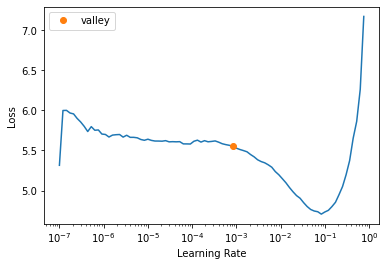

In [13]:
learner.lr_find()

In [15]:
learner.fine_tune(10, 1e-2)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

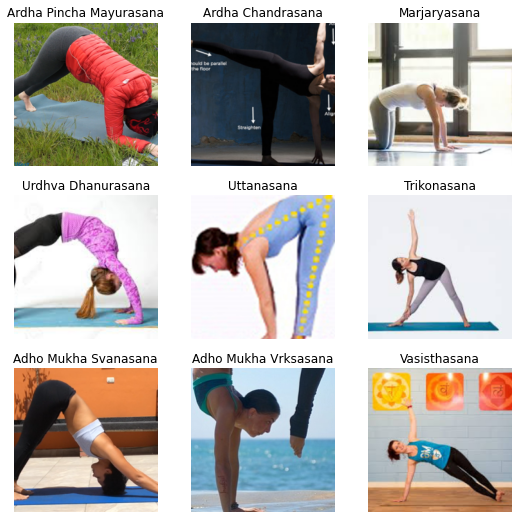

In [16]:
dls.show_batch()

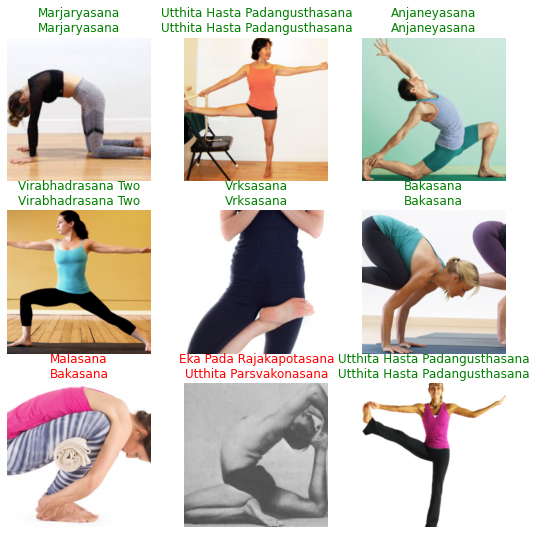

In [19]:
learner.show_results()

In [35]:
from google.colab import files
uploaded = files.upload()

Saving uthita.png to uthita.png


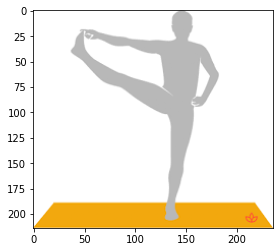

In [36]:
import matplotlib.pyplot as plt
img = plt.imread('uthita.png')
plt.imshow(img)

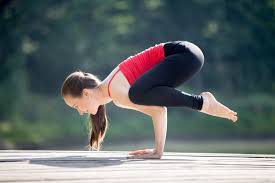

In [44]:
img = load_image('bakasana.jpg')
img

In [45]:
import numpy as np
import os
cat, tensor, probs = learner.predict(np.array(img))
# classes = list(filter(os.path.isdir, os.listdir(os.getcwd())))
# classes = classes[1:]
# classes ------------------------------ no need ; erroneous; use dls.vocab instead

for c, pct in zip(classes, probs):
  print(f'{c} -> {pct*100:.2f}')

Adho Mukha Svanasana -> 0.03
Adho Mukha Vrksasana -> 0.53
Alanasana -> 0.31
Anjaneyasana -> 0.00
Ardha Chandrasana -> 2.39
Ardha Matsyendrasana -> 0.00
Ardha Navasana -> 0.03
Ardha Pincha Mayurasana -> 0.00
Ashta Chandrasana -> 0.01
Baddha Konasana -> 0.13
Bakasana -> 63.45
Balasana -> 0.33
Bitilasana -> 1.06
Camatkarasana -> 2.12
Dhanurasana -> 0.00
Eka Pada Rajakapotasana -> 0.00
Garudasana -> 0.01
Halasana -> 0.00
Hanumanasana -> 0.00
Malasana -> 0.03
Marjaryasana -> 0.19
Navasana -> 0.00
Padmasana -> 0.00
Parsva Virabhadrasana -> 1.32
Parsvottanasana -> 0.05
Paschimottanasana -> 0.00
Phalakasana -> 19.58
Pincha Mayurasana -> 0.01
Salamba Bhujangasana -> 0.10
Salamba Sarvangasana -> 0.00
Setu Bandha Sarvangasana -> 0.05
Sivasana -> 2.15
Supta Kapotasana -> 0.47
Trikonasana -> 0.08
Upavistha Konasana -> 0.03
Urdhva Dhanurasana -> 0.49
Urdhva Mukha Svsnssana -> 0.17
Ustrasana -> 0.12
Utkatasana -> 0.23
Uttanasana -> 0.01
Utthita Hasta Padangusthasana -> 0.00
Utthita Parsvakonasana -> 

In [46]:
learner.export('yoga.pkl')

In [47]:
new_learner = load_learner('yoga.pkl')

In [48]:
cat, tensor, probs = new_learner.predict(np.array(img))
# classes = list(filter(os.path.isdir, os.listdir(os.getcwd())))
# classes = classes[1:]
# classes ------------------------------ no need ; erroneous; use dls.vocab instead

for c, pct in zip(classes, probs):
  print(f'{c} -> {pct*100:.2f}')

Adho Mukha Svanasana -> 0.03
Adho Mukha Vrksasana -> 0.54
Alanasana -> 0.32
Anjaneyasana -> 0.00
Ardha Chandrasana -> 2.51
Ardha Matsyendrasana -> 0.00
Ardha Navasana -> 0.03
Ardha Pincha Mayurasana -> 0.00
Ashta Chandrasana -> 0.01
Baddha Konasana -> 0.14
Bakasana -> 61.73
Balasana -> 0.33
Bitilasana -> 1.10
Camatkarasana -> 2.26
Dhanurasana -> 0.00
Eka Pada Rajakapotasana -> 0.00
Garudasana -> 0.01
Halasana -> 0.00
Hanumanasana -> 0.00
Malasana -> 0.03
Marjaryasana -> 0.20
Navasana -> 0.00
Padmasana -> 0.00
Parsva Virabhadrasana -> 1.33
Parsvottanasana -> 0.05
Paschimottanasana -> 0.00
Phalakasana -> 20.16
Pincha Mayurasana -> 0.01
Salamba Bhujangasana -> 0.10
Salamba Sarvangasana -> 0.00
Setu Bandha Sarvangasana -> 0.05
Sivasana -> 2.37
Supta Kapotasana -> 0.49
Trikonasana -> 0.08
Upavistha Konasana -> 0.03
Urdhva Dhanurasana -> 0.50
Urdhva Mukha Svsnssana -> 0.17
Ustrasana -> 0.13
Utkatasana -> 0.22
Uttanasana -> 0.01
Utthita Hasta Padangusthasana -> 0.00
Utthita Parsvakonasana -> 